# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Сгруппируем данные по числу детей и выведем общее количество записей в каждой группе

In [23]:
data.value_counts('children')

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
dtype: int64

Теперь сгруппируем данные по колчиеству детей и выведем среднее значение столбца `debt`. В этом столбце стоит 0, если задолженностей не было, и 1 - если были. Таким образом, с некоторым приближением среднее значение для каждой категории можно трактовать как вероятность того, что человек с таким числом детей будет иметь задолженность.

In [24]:
proba_of_debt_children = data.groupby('children').agg({'debt': 'mean'}).rename(
    columns={'debt': 'debt_proba'}
).reset_index()

proba_of_debt_children

,children,debt_proba
0,0,0.075438
1,1,0.092346
2,2,0.094542
3,3,0.081818
4,4,0.097561
5,5,0.000000


In [25]:
data.pivot_table(index = 'children', values = 'debt'
                 , aggfunc = ['count', 'sum', 'mean'])\
    .sort_values(by = ('mean', 'debt'), ascending = False)\
    .style.format({('mean', 'debt') : '{:.2%}'})

,count,sum,mean
,debt,debt,debt
children,,,
4,41,4,9.76%
2,2052,194,9.45%
1,4808,444,9.23%
3,330,27,8.18%
0,14091,1063,7.54%
5,9,0,0.00%


Для наглядности нанесем полученные вероятности на график

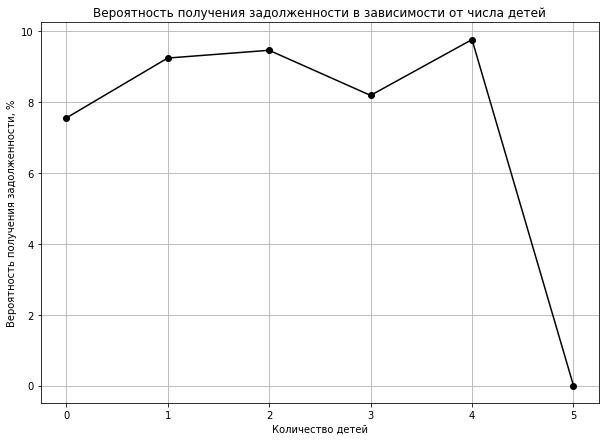

In [26]:
fig_children = plt.figure(figsize=(10, 7))

plt.plot(
    proba_of_debt_children['children'],
    proba_of_debt_children['debt_proba'] * 100, # Переведем в % 
    color='k',
    marker='o'
)

plt.xlabel('Количество детей')
plt.ylabel('Вероятность получения задолженности, %')
plt.title('Вероятность получения задолженности в зависимости от числа детей')
plt.grid()

plt.show()

**Вывод:** Четкой зависимости между количеством детей и вероятностью получения задолженности в данных нет. Вероятность наличия задолженности увеличивается с ростом количества детей. Например, для заемщиков без детей вероятность задолженности составляет около 7.5%, тогда как для заемщиков с одним ребенком она возрастает до 9.2%, а с двумя детьми — до 9.5%. Однако для заемщиков с тремя и более детьми вероятность снижается, что может быть связано с небольшим количеством таких заемщиков в выборке. Интересной закономерностью является то, что у людей с 5 детьми задолженностей не бывает. Однако для данной выборки в данных есть только 9 записей, так что делать глобальные выводы по ней не стоит. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Посмотрим на то, какие вообще категории семейного положения представлены в данных

In [27]:
data.value_counts('family_status')

family_status
женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
dtype: int64

Теперь сгруппируем данные по семейному положению и выведем среднее значение столбца `debt`. В этом столбце стоит 0, если задолженностей не было, и 1 - если были. Таким образом, с некоторым приближением среднее значение для каждой категории можно трактовать как вероятность того, что человек с таким семейным положением будет иметь задолженность. Для лучшего понимания групп посчитаем дополнительно средний возраст в каждой из них

In [28]:
proba_of_debt_famstat = data.groupby('family_status').agg({
    'debt': 'mean', 'dob_years': 'mean'
}).rename(
    columns={'debt': 'debt_proba', 'dob_years': 'mean_dob_years'}
).reset_index().sort_values(by='debt_proba')

proba_of_debt_famstat

,family_status,debt_proba,mean_dob_years
2,вдовец / вдова,0.066246,56.501577
1,в разводе,0.070648,45.561817
4,женат / замужем,0.075606,43.558519
3,гражданский брак,0.093130,42.067731
0,Не женат / не замужем,0.097639,38.368026


Для наглядности построим по полученным данным гистограмму

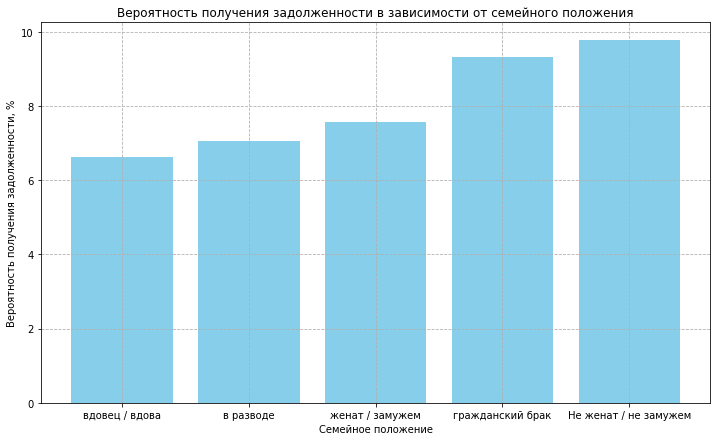

In [29]:
fig_famstat = plt.figure(figsize=(12, 7))

plt.bar(
    proba_of_debt_famstat['family_status'],
    proba_of_debt_famstat['debt_proba'] * 100,
    color='skyblue'
)

plt.xlabel('Семейное положение')
plt.ylabel('Вероятность получения задолженности, %')
plt.title('Вероятность получения задолженности в зависимости от семейного положения')
plt.grid(ls='--')

plt.show()

**Вывод:** По полученным данным видно, что наибольшая вероятность нарушить кредитное обязательство у не женатых / не замужних людей. Это может быть связано с меньшей стабильностью данной группы, ее представители также имеют наименьший средний возраст. У людей в гражданском браке вероятность задолженности больше, чем у людей в официальном - это может быть связано с меньшей формальной ответственностью таких людей. Вдовцы и вдовы, имея самый высокий средний возраст, также имеют наименьшую долю задолженностей, что может быть объяснено средней состоятельностью этой группы людей.

Сначала посмотрим какие возрасты вообще есть в наших данных

In [30]:
np.sort(data.dob_years.unique())

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Удалим данные о людях с возрастом 0

In [31]:
data = data[data['dob_years'] > 0]

Теперь сгруппируем данные по возрасту и выведем среднее значение столбца `debt`. В этом столбце стоит 0, если задолженностей не было, и 1 - если были. Таким образом, с некоторым приближением среднее значение для каждой категории можно трактовать как вероятность того, что человек с таким возрастом будет иметь задолженность.

In [32]:
proba_of_debt_dob = data.groupby('dob_years').agg({'debt': 'mean'}).rename(
    columns={'debt': 'debt_proba'}
).reset_index()

proba_of_debt_dob

,dob_years,debt_proba
0,19,0.071429
1,20,0.078431
2,21,0.127273
3,22,0.136612
4,23,0.080000
5,24,0.091255
6,25,0.120787
7,26,0.115764
8,27,0.100000
9,28,0.113772


Для наглядности нанесем полученные вероятности на график

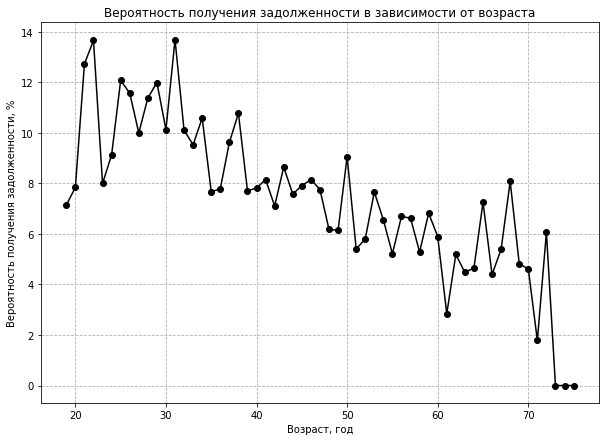

In [33]:
fig_dob = plt.figure(figsize=(10, 7))

plt.plot(
    proba_of_debt_dob['dob_years'],
    proba_of_debt_dob['debt_proba'] * 100, # Переведем в % 
    color='k',
    marker='o'
)

plt.xlabel('Возраст, год')
plt.ylabel('Вероятность получения задолженности, %')
plt.title('Вероятность получения задолженности в зависимости от возраста')
plt.grid(ls='--')

plt.show()

**Вывод:** На полученном графике видна четкая тенденция снижения доли должников с увеличением возраста. Это ожидаемо, с возрастом укрепляется финансовое положение людей, так же как и их сознательность в финансовых вопросах.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Посмотрим какие категории уровня дохода представлены

In [34]:
data.total_income_category.value_counts()

C    15849
B     4988
D      347
A       25
E       22
Name: total_income_category, dtype: int64

Сгруппируем наши данные по категориям уровня дохода и вычислим вероятность наличия задолженности

In [35]:
proba_of_debt_income = data.groupby('total_income_category').agg({
    'debt': 'mean', 'dob_years': 'mean'
}).rename(
    columns={'debt': 'debt_proba', 'dob_years': 'mean_dob_years'}
).reset_index().sort_values(by='debt_proba')

proba_of_debt_income

,total_income_category,debt_proba,mean_dob_years
3,D,0.060519,49.541787
1,B,0.070770,42.552927
0,A,0.080000,45.280000
2,C,0.084926,43.622626
4,E,0.090909,55.000000


Для наглядности построим по полученным данным гистограмму

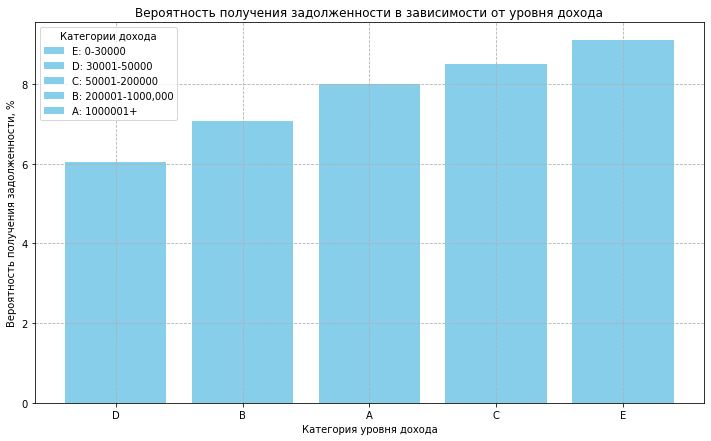

In [36]:
fig_income = plt.figure(figsize=(12, 7))

bars = plt.bar(
    proba_of_debt_income['total_income_category'],
    proba_of_debt_income['debt_proba'] * 100,
    color='skyblue'
)

plt.xlabel('Категория уровня дохода')
plt.ylabel('Вероятность получения задолженности, %')
plt.title('Вероятность получения задолженности в зависимости от уровня дохода')
plt.grid(ls='--')
plt.legend(bars, ['E: 0-30000', 'D: 30001-50000', 'C: 50001-200000', 
                  'B: 200001-1000,000', 'A: 1000001+'], 
           title='Категории дохода')

plt.show()

**Вывод:** Заемщики с меньшим уровнем дохода (категория С) имеют более высокую вероятность задолженности по сравнению с заемщиками с более высоким доходом (категория B). Этой же закономерности подчиняются и заемщики из категории Е. Для групп D и A эта закономерность может нарушаться из-за их низкой представленности в данных. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Сначала посмотрим какие цели кредита есть в наших данных

In [37]:
data.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Различных целей много, поэтому воспользуемся категориями, на которые мы разбили все цели ранее. Рассмотрим эти группы

In [38]:
data.purpose_category.value_counts()

операции с недвижимостью    10704
операции с автомобилем       4258
получение образования        3970
проведение свадьбы           2299
Name: purpose_category, dtype: int64

Сгруппируем данные по этим направлениям и выведем среднее значение столбца `debt`. В этом столбце стоит 0, если задолженностей не было, и 1 - если были. Таким образом, с некоторым приближением среднее значение для каждой категории можно трактовать как вероятность того, что человек будет иметь задолженность при определенной цели кредита. Дополнительно посмотрим на средний возраст людей по группам

In [39]:
proba_of_debt_purpose = data.groupby('purpose_category').agg({
    'debt': 'mean', 'dob_years': 'mean'
}).rename(
    columns={'debt': 'debt_proba', 'dob_years': 'mean_dob_years'}
).reset_index().sort_values(by='debt_proba')

proba_of_debt_purpose

,purpose_category,debt_proba,mean_dob_years
1,операции с недвижимостью,0.072590,43.358464
3,проведение свадьбы,0.078730,43.392779
2,получение образования,0.092947,43.612343
0,операции с автомобилем,0.093236,43.718178


Для наглядности построим по полученным данным гистограмму

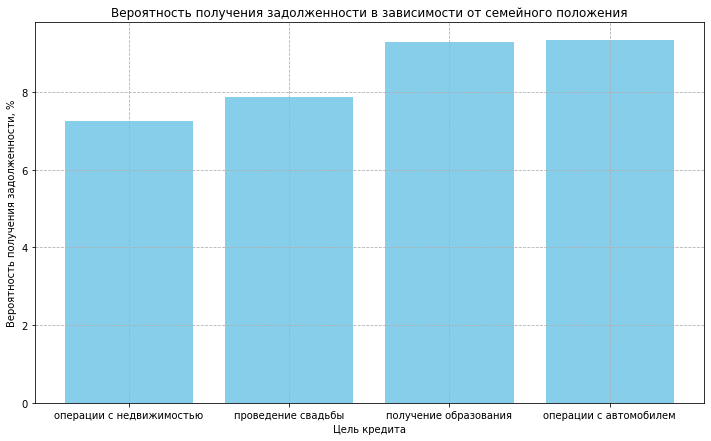

In [40]:
fig_purpose = plt.figure(figsize=(12, 7))

plt.bar(
    proba_of_debt_purpose['purpose_category'],
    proba_of_debt_purpose['debt_proba'] * 100,
    color='skyblue'
)

plt.xlabel('Цель кредита')
plt.ylabel('Вероятность получения задолженности, %')
plt.title('Вероятность получения задолженности в зависимости от семейного положения')
plt.grid(ls='--')

plt.show()

**Вывод:** По полученным данным видно, что наименьшая доля задолженностей у тех, кто берет кредит для операция с недвижимостью. Так как данная категория требует наибольших сумм, к ней люди подходят наиболее ответственно. У людей, берущих кредит на образование, нет достаточной финансовой стабильности, поэтому они имеют относительно высокий процент задолженностей. Также можно сделать вывод о том, что те, кто берут кредит на операцию с автомобилем, наименее ответственно подходят к своим финансам, что отражено в наибольшей вероятности получения задолженности.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Посмотрим в каких столбцах присутствуют пропуски

In [41]:
data.isna().sum()

children                 0
days_employed            0
dob_years                0
education                0
education_id             0
family_status            0
family_status_id         0
gender                   0
income_type              0
debt                     0
total_income             0
purpose                  0
total_income_category    0
purpose_category         0
dtype: int64

*Ответ:* Мы уже устранили все пропуски. Изначально в данных были пропуски в столбцах `days_employed` и `total_income`, то есть в общем трудовом стаже и в ежемесячном доходе. Причины этих пропусков могут быть в том, что некоторые люди еще не имеют стажа, а кто-то может не иметь и постоянного ежемесячного дохода. Также есть возможность того, что люди не хотят раскрывать информацию о работе и доходах. 

Также можно было ожидать пропусков в столбце `family_status_id`, если в столбце `family_status` были допущены ошибки, из-за которых автоматическое присваивание id давало ошибку. Аналогично `total_income`, мы могли ожидать пропуски в столбце `income_type`.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Как мы видели и в наших данных в том числе, в реальных количественных данных часто появляются выбросы - экстремальные значения. Среднее число к этим выбросам очень чувствительно, в то время как медиана - нет. Из-за этого недостатка среднего наиболее часто на практике используют медианное значение или выборочное среднее (выборка идет отбрасыванием "концов" данных, которые и будут содержать все выбросы)

### Шаг 4: общий вывод.

Проведенный анализ выявил следующие закономерности в данных, влияющих на возврат кредита в срок:

* **Число детей**

Четкой зависимости между количеством детей и вероятностью получения задолженности в данных нет. Вероятность наличия задолженности увеличивается с ростом количества детей. Например, для заемщиков без детей вероятность задолженности составляет около 7.5%, тогда как для заемщиков с одним ребенком она возрастает до 9.2%, а с двумя детьми — до 9.5%. Однако для заемщиков с тремя и более детьми вероятность снижается, что может быть связано с небольшим количеством таких заемщиков в выборке. 

* **Семейное положение**
  
Наибольшая вероятность нарушить кредитное обязательство у не женатых / не замужних людей. Это может быть связано с меньшей стабильностью данной группы, ее представители также имеют наименьший средний возраст. У людей в гражданском браке вероятность задолженности больше, чем у людей в официальном - это может быть связано с меньшей формальной ответственностью таких людей. Вдовцы и вдовы, имея самый высокий средний возраст, также имеют наименьшую долю задолженностей, что может быть объяснено средней состоятельностью этой группы людей.

* **Возраст**
  
Есть четкая тенденция снижения доли должников с увеличением возраста. Это ожидаемо, с возрастом укрепляется финансовое положение людей, так же как и их сознательность в финансовых вопросах.

* **Цель кредита**

По полученным данным видно, что наименьшая доля задолженностей у тех, кто берет кредит для операция с недвижимостью. Так как данная категория требует наибольших сумм, к ней люди подходят наиболее ответственно. У людей, берущих кредит на образование, нет достаточной финансовой стабильности, поэтому они имеют относительно высокий процент задолженностей. Также можно сделать вывод о том, что те, кто берут кредит на операцию с автомобилем, наименее ответственно подходят к своим финансам, что отражено в наибольшей вероятности получения задолженности.